In [63]:
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from IPython.display import clear_output


In [64]:
pd.set_option('display.max_rows', 500)

In [65]:
def extended_score(y_pred, y_reel):
    n = len(y_pred)
    c = 0
    for i in range(n):
        if(abs(y_pred[i] - y_reel[i]) <= 1) : 
            c += 1
    return c/n

# Importing the training dataset

In [91]:
DATA = "train.csv"
df = pd.read_csv(DATA, na_values='NAN')
dataframe = pd.DataFrame(df)
print(df.columns)
print(dataframe)
print(len(df.columns))
#We have 129 columns

Index(['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_4',
       'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht',
       'Wt',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=129)
       Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0                   1             A8              26        0.230769   
1                   1             D2              26        1.000000   
2                   1             D2              26        0.230769   
3                   1             D4              26        0.230769   
4                   1             E1              10        0.230769   
5                   1             A3              26        0.128205   
6                   1             A6      

# Looking for missing values
#### Count total NaN at each column in DataFrame

In [92]:
#Missing values
#Count total NaN at each column in DataFrame
df.isnull().sum().sum()

485665

### Taking out columns with sensible data

In [93]:
df = df.drop(columns = ["InsuredInfo_7","InsuredInfo_8","InsuredInfo_9" ])

#### Removing all columns with more than 50% missing values

In [94]:
half_count = len(df) / 2
df = df.dropna(thresh=half_count,axis=1) # Drop any column with more than 50% missing values
len(df.columns)

#Dropped 8 columns

120

#### Transforming the other columns that have missign values by fillning the values with the mean of the column

In [95]:
#Fill in the null values with the mean because there is just a little Null values
df["Employment_Info_1"] = df["Employment_Info_1"].fillna(value=df["Employment_Info_1"].mean())
df["Employment_Info_4"] = df["Employment_Info_4"].fillna(value=df["Employment_Info_4"].mean())
df["Employment_Info_6"] = df["Employment_Info_6"].fillna(value=df["Employment_Info_6"].mean())
df["Insurance_History_5"] = df["Insurance_History_5"].fillna(value=df["Insurance_History_5"].mean())
df["Family_Hist_2"] = df["Family_Hist_2"].fillna(value=df["Family_Hist_2"].mean())
df["Family_Hist_4"] = df["Family_Hist_4"].fillna(value=df["Family_Hist_4"].mean())
df["Medical_History_1"] = df["Medical_History_1"].fillna(value=df["Medical_History_1"].mean())

#### Checking if we still have missign values

In [96]:
df.isnull().values.any()


False

# Labelling the values 
#### To only have numerical values

In [97]:
df = df.apply(preprocessing.LabelEncoder().fit_transform)

In [98]:

print(len(df.columns))

120


# Exploratory data analysis

#### Analysing the mean, stand variation and skeweness

In [100]:
#Mean, Standard Variation and Skeweness
print("Mean" )
print(df.mean(axis = 0)) 
print("Standard Deviation" )
print(df.std())
print("Skewness" )
    #For skewness between -0.5 and 0.5 our data is quite symmetrical and not skewed too much.
    #For skewness between -1.0 and -0.5 or 0.5 and 1.0 our data is moderately skewed.
    #For skewness exceeding 1.0 or below -1.0 our data is excessively skewed.
print(df.skew(axis=0))

Mean
Product_Info_1            0.026426
Product_Info_2           12.504968
Product_Info_3           20.626416
Product_Info_4          744.552691
Product_Info_5            0.006946
Product_Info_6            0.836772
Product_Info_7            0.043681
Ins_Age                  27.177494
Ht                       21.901683
Wt                      101.833834
BMI                    1250.670590
Employment_Info_1       948.777534
Employment_Info_2         6.816002
Employment_Info_3         0.150473
Employment_Info_4        71.766206
Employment_Info_5         0.142898
Employment_Info_6       536.748153
InsuredInfo_1             0.209100
InsuredInfo_2             0.007456
InsuredInfo_3             4.835159
InsuredInfo_4             0.883426
InsuredInfo_5             0.013621
InsuredInfo_6             0.019310
Insurance_History_1       0.727382
Insurance_History_2       0.055621
Insurance_History_3       1.147076
Insurance_History_4       0.958577
Insurance_History_5    1476.811009
Insurance_Histo

Product_Info_1          5.905098
Product_Info_2         -1.031386
Product_Info_3         -2.339385
Product_Info_4         -0.096396
Product_Info_5         11.873395
Product_Info_6         -1.822541
Product_Info_7          6.542986
Ins_Age                 0.021018
Ht                     -0.069548
Wt                      0.656631
BMI                     0.630227
Employment_Info_1      -0.195393
Employment_Info_2       0.839517
Employment_Info_3       1.955257
Employment_Info_4       2.792030
Employment_Info_5       2.040812
Employment_Info_6      -0.204745
InsuredInfo_1           1.618468
InsuredInfo_2          11.451615
InsuredInfo_3           0.107710
InsuredInfo_4          -2.389661
InsuredInfo_5           8.392562
InsuredInfo_6           6.986305
Insurance_History_1    -1.021267
Insurance_History_2     5.743531
Insurance_History_3    -0.297394
Insurance_History_4     0.082515
Insurance_History_5    -1.215086
Insurance_History_7     0.196725
Insurance_History_8    -0.079569
Insurance_

#### Analysing the distribution of the features by a histogram plot

C:\Users\Lia\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


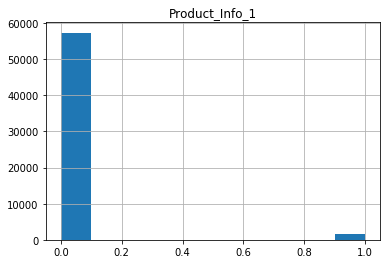

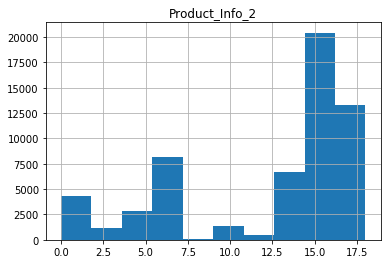

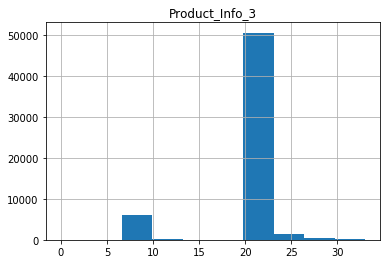

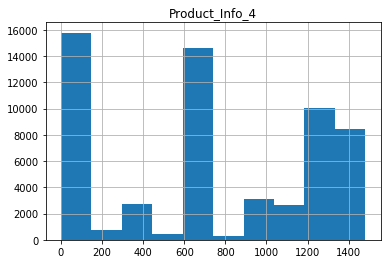

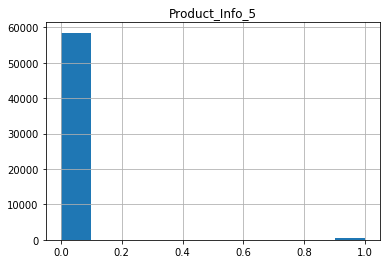

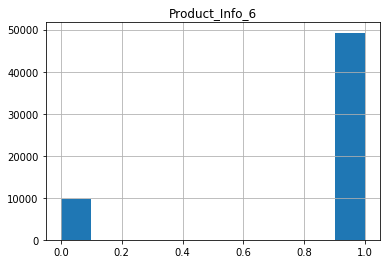

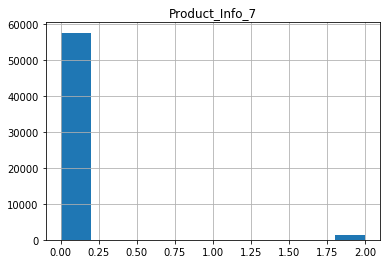

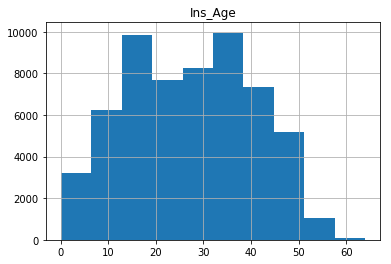

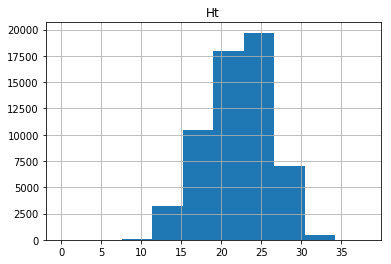

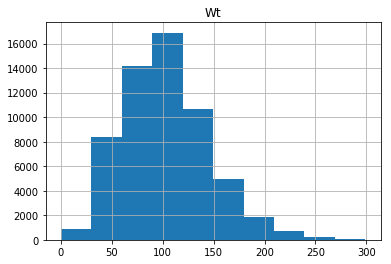

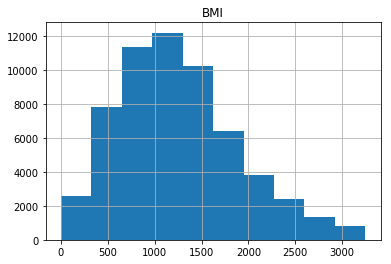

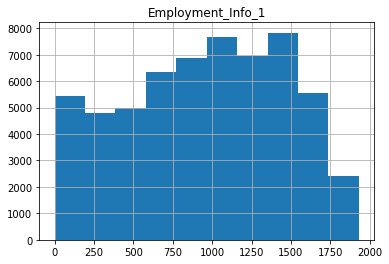

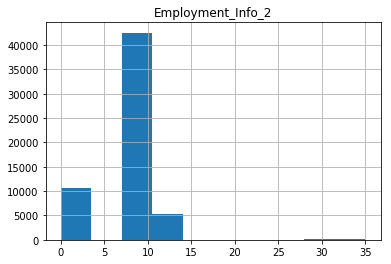

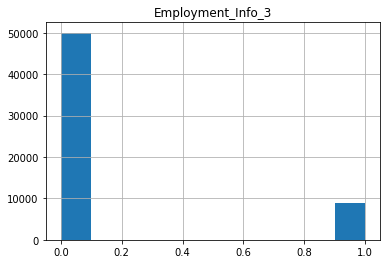

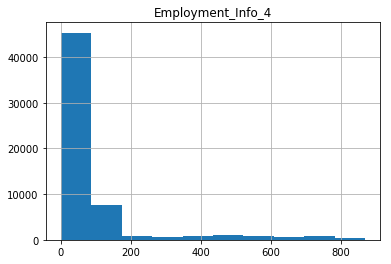

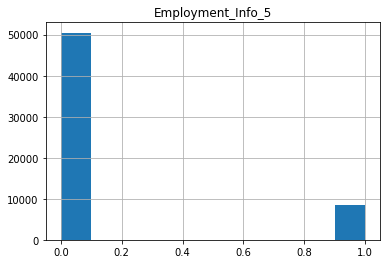

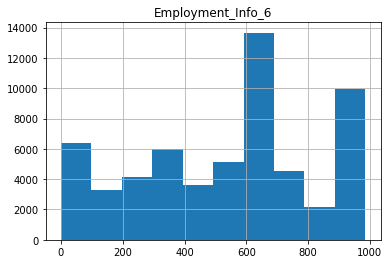

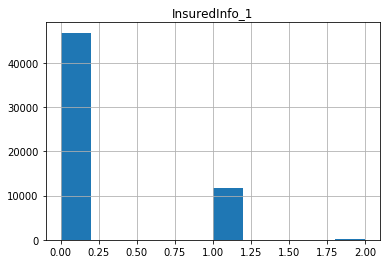

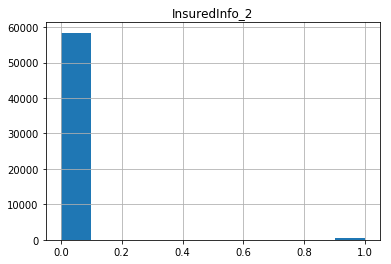

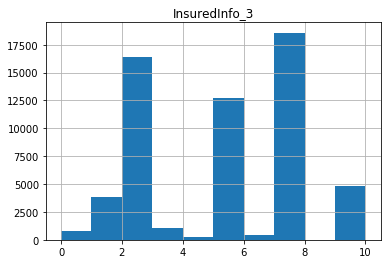

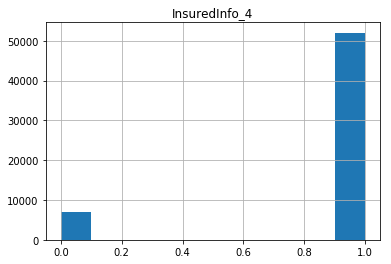

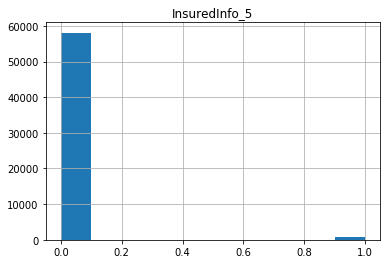

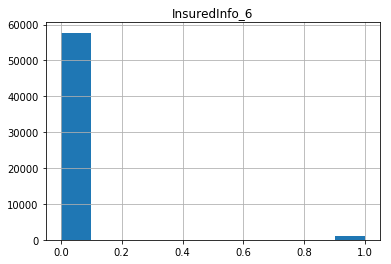

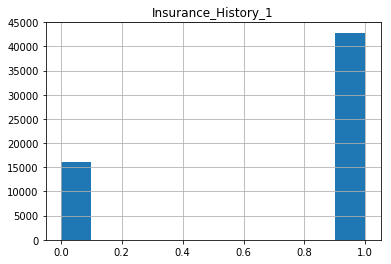

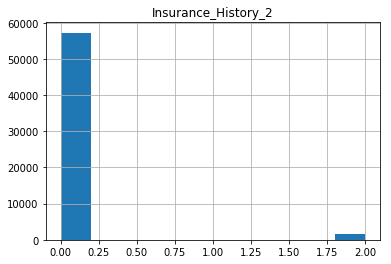

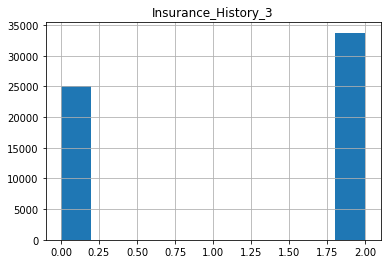

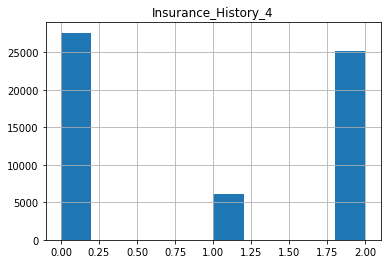

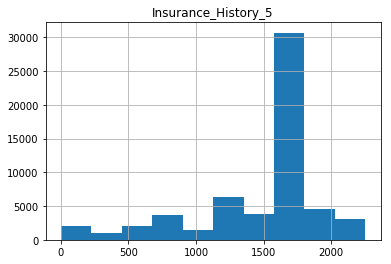

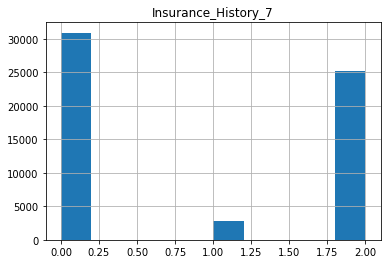

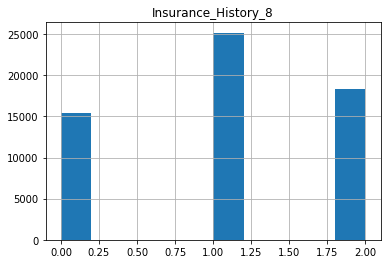

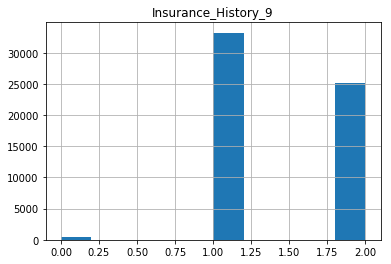

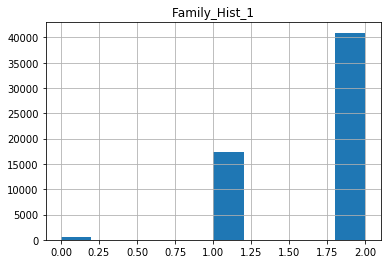

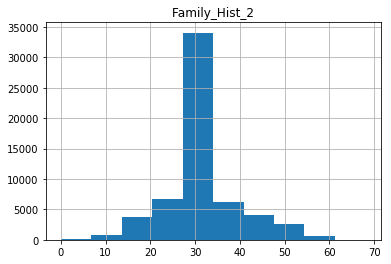

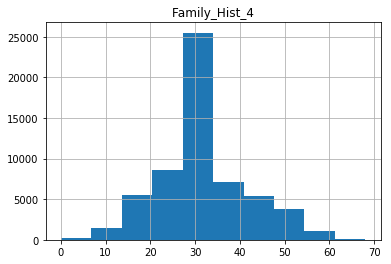

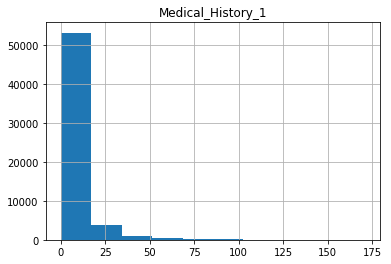

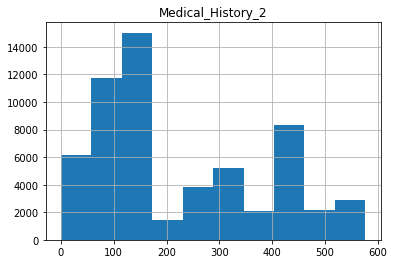

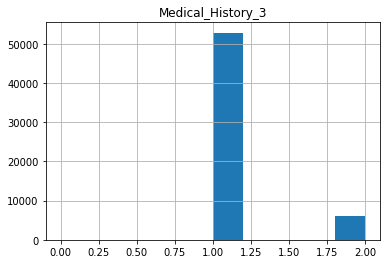

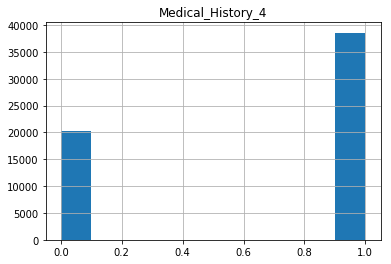

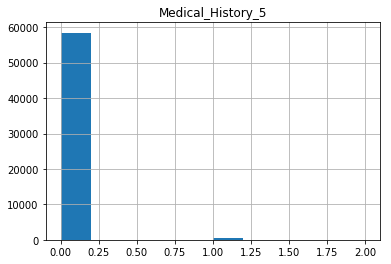

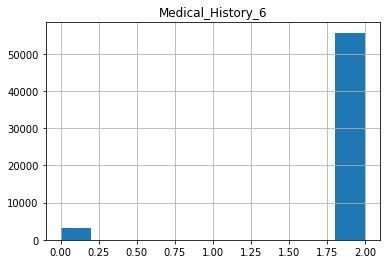

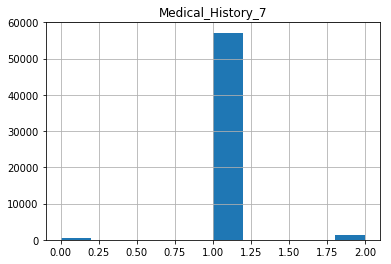

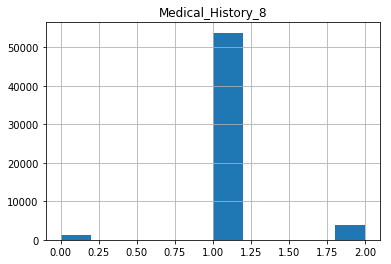

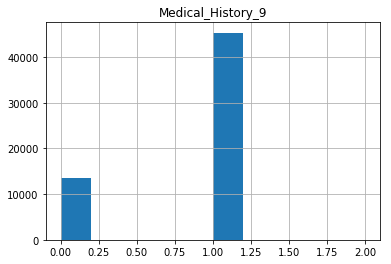

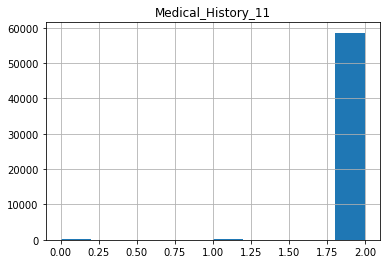

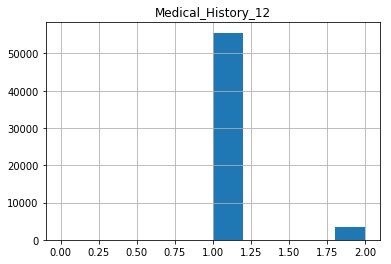

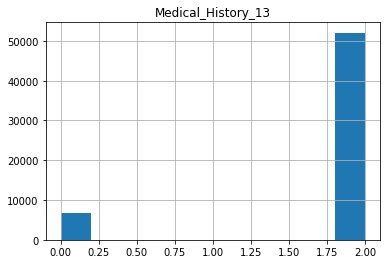

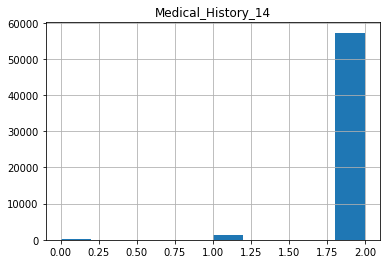

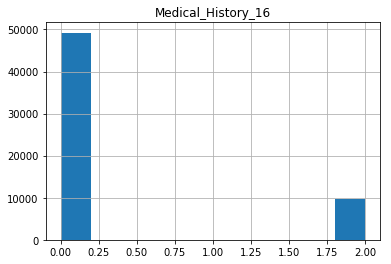

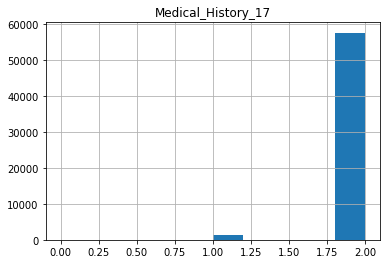

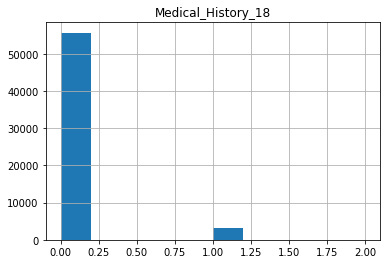

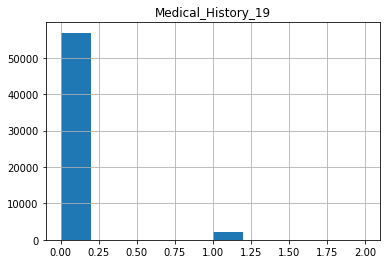

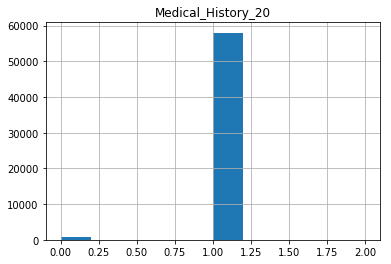

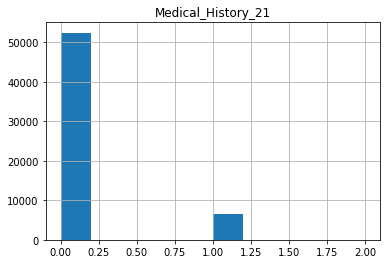

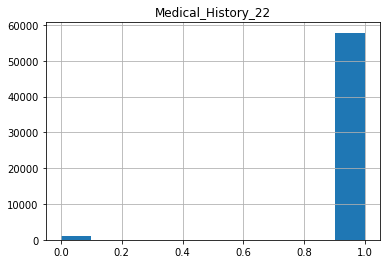

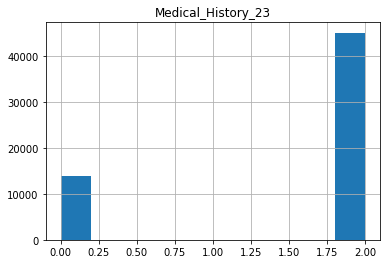

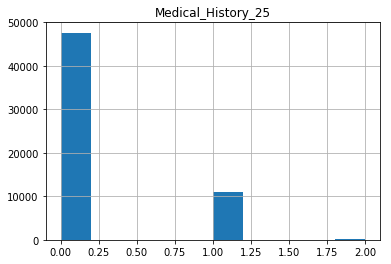

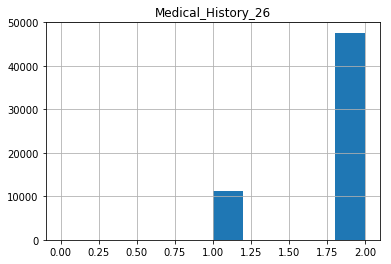

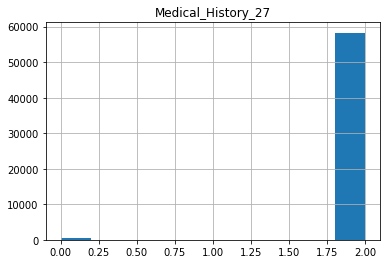

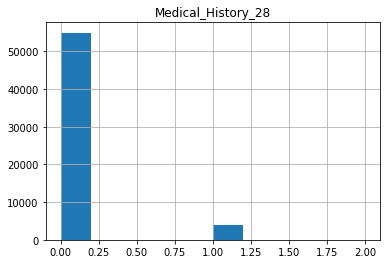

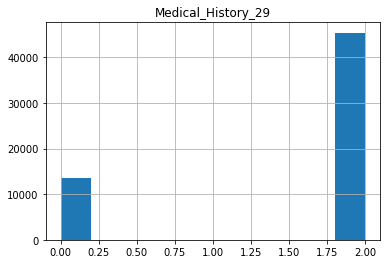

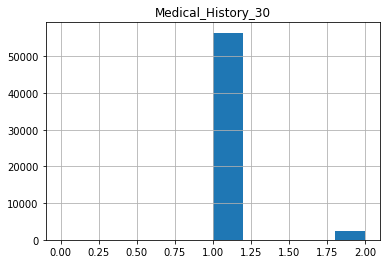

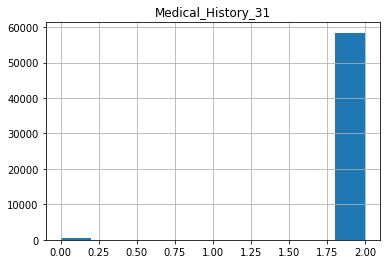

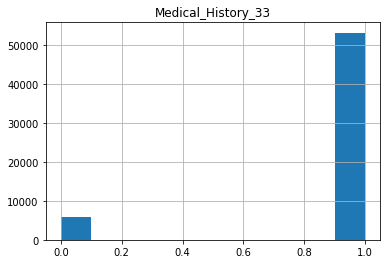

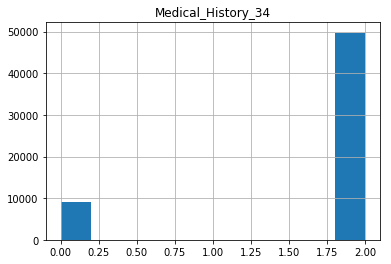

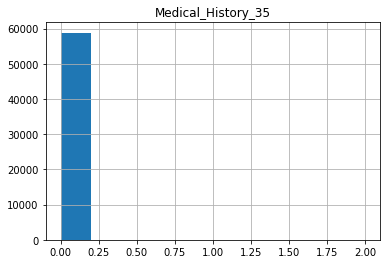

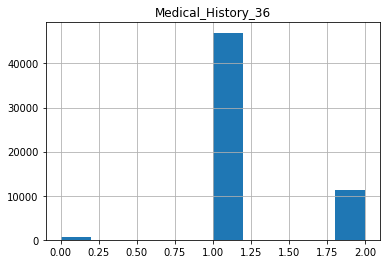

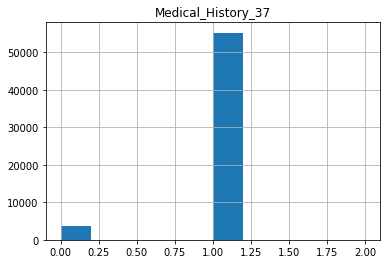

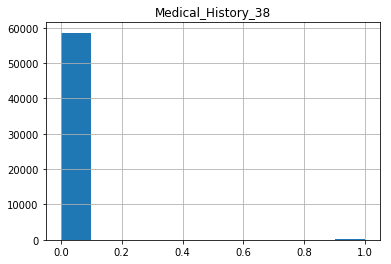

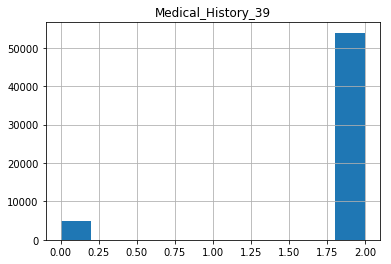

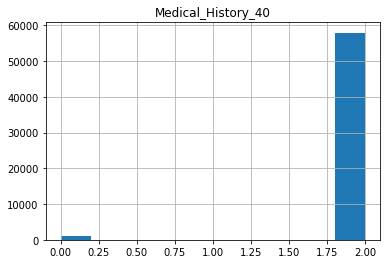

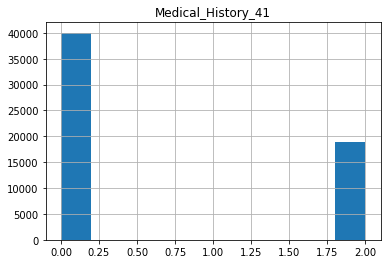

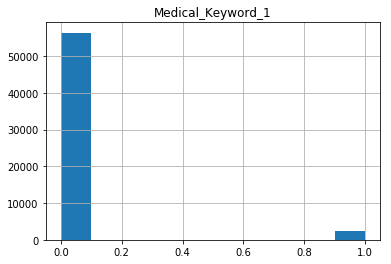

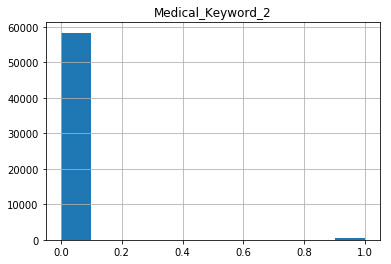

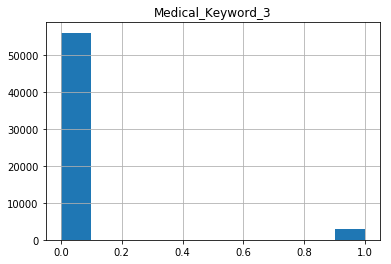

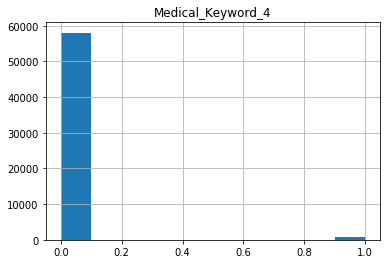

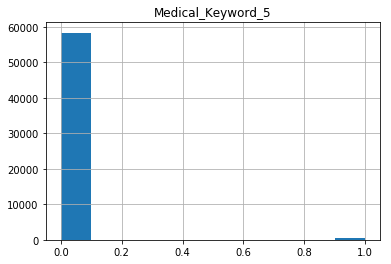

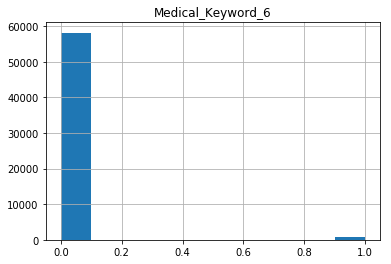

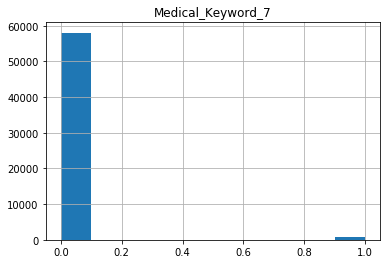

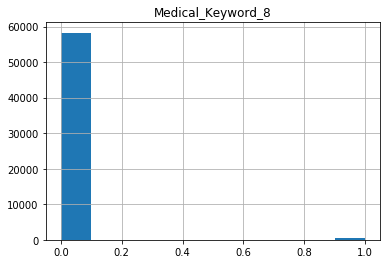

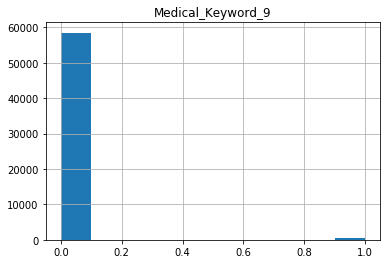

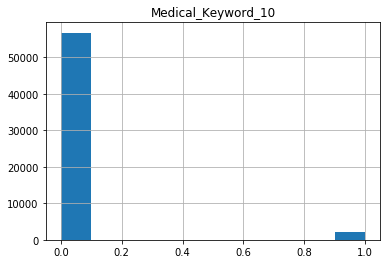

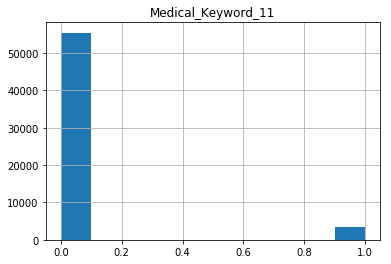

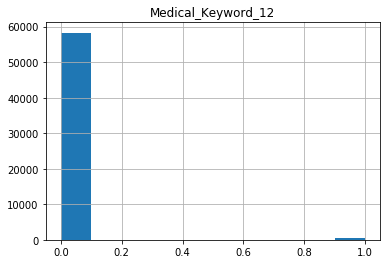

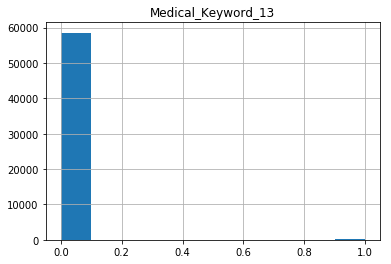

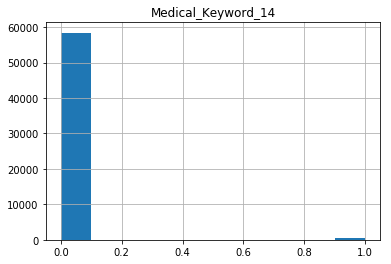

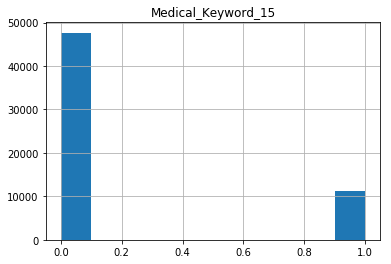

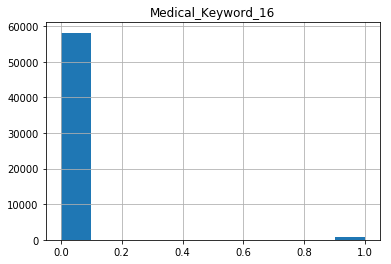

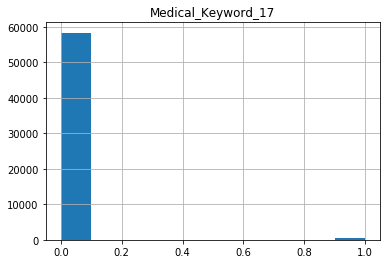

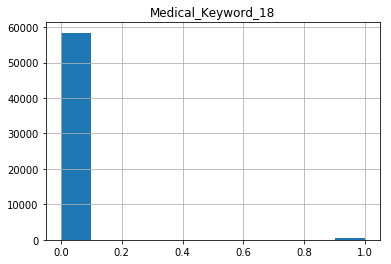

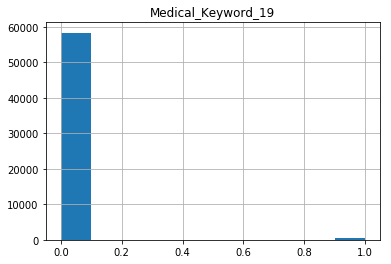

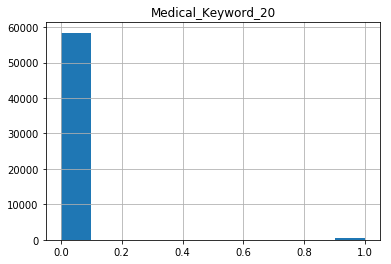

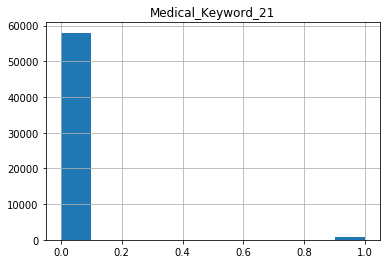

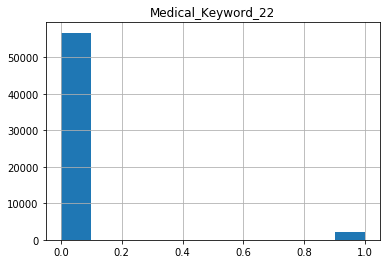

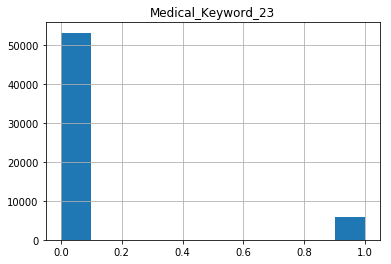

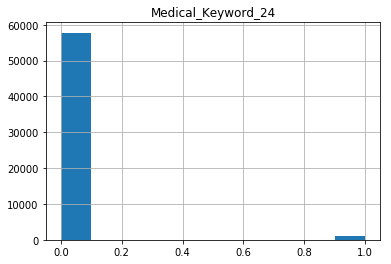

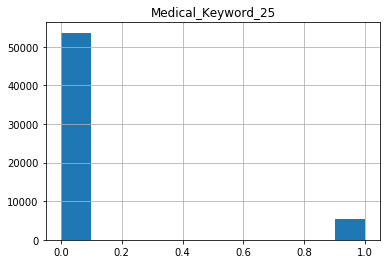

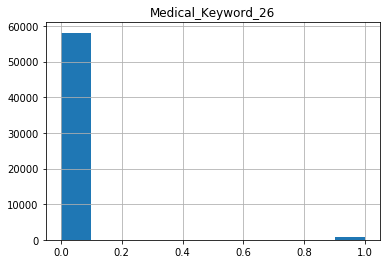

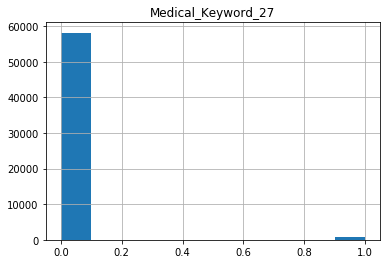

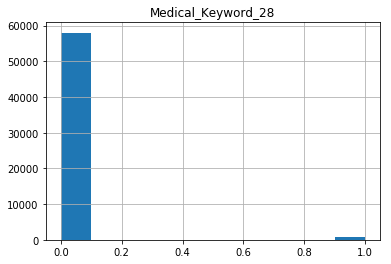

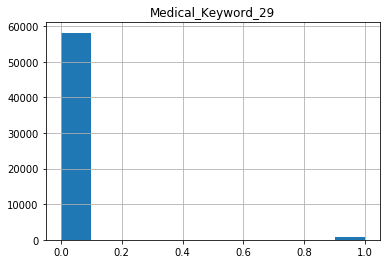

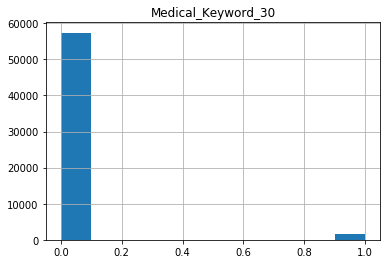

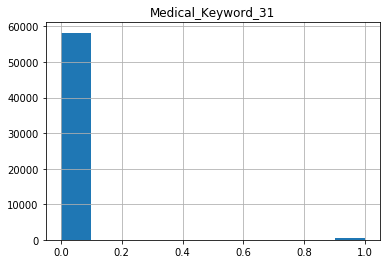

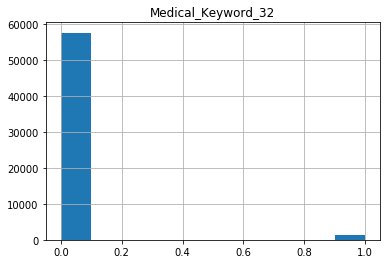

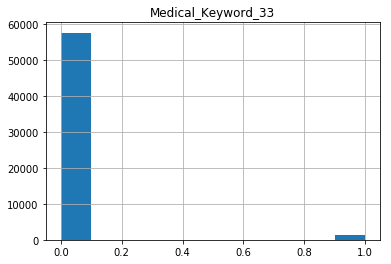

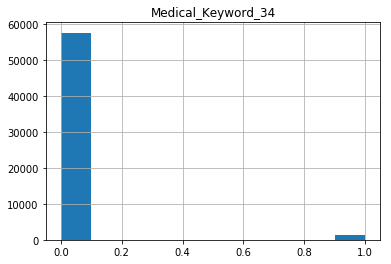

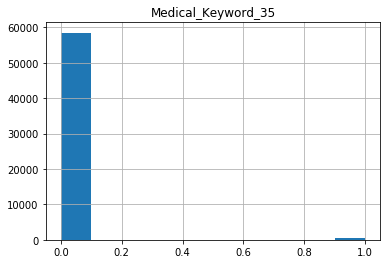

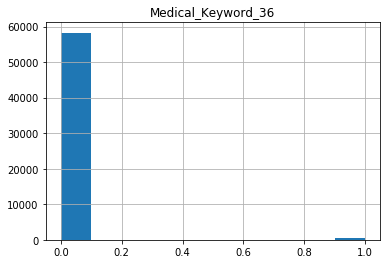

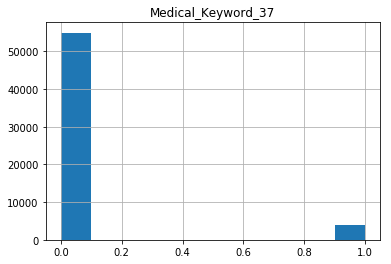

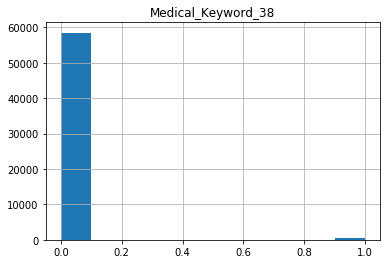

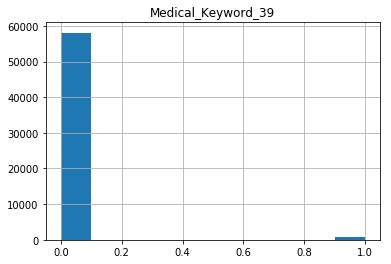

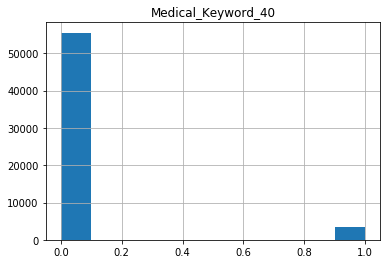

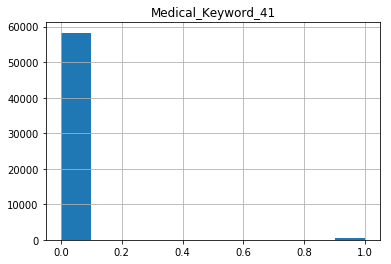

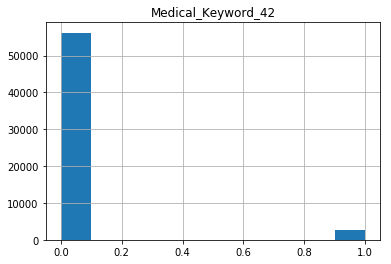

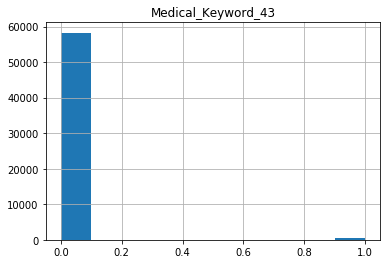

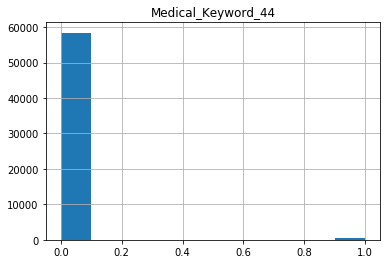

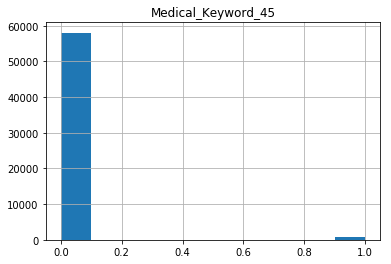

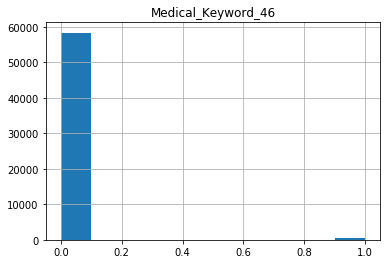

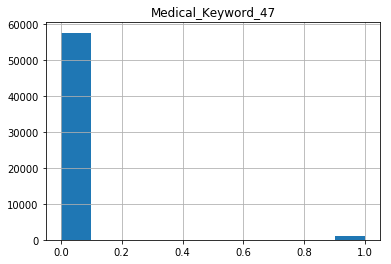

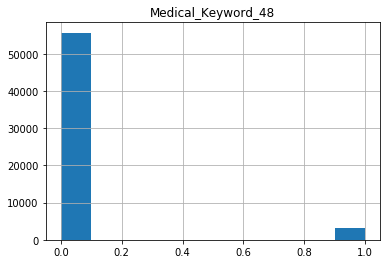

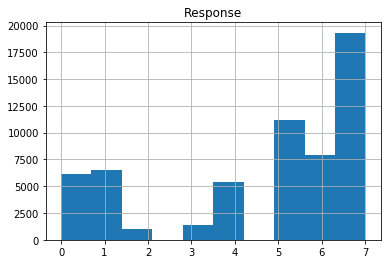

In [36]:
#Histogram
for i in df:
    df.hist(column=i)

####  Analysing the number of people for each reponse

Text(0,0.5,'Response Label')

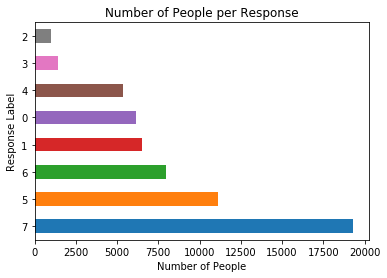

In [103]:
#Imbalaced Dataset
df['Response'].value_counts()[:20].plot(kind='barh')
plt.title('Number of People per Response')
plt.xlabel('Number of People')
plt.ylabel('Response Label')

### Result of analysis: We have a imbalaced dataset with a big part of the values given a Response 7. And we have categorical and quantitative features and they have to be pre-processed differently.

# Splitting the dataset into train and test.

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Response'])
y = df["Response"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [100]:
print(sorted(Counter(y_train).items()))
len(X_test)

[(0, 4086), (1, 4310), (2, 688), (3, 975), (4, 3598), (5, 7513), (6, 5301), (7, 12979)]


19431

In [105]:
cols = df.drop(columns =["Response"]).columns

X_train.shape
df_train = pd.DataFrame(X_train,  columns = cols)
df_train["Response"] = y_train
df_train.shape

(39450, 120)

# Data pre-processing


## Quantitative values

#### Get the quantitative columns

In [102]:
#Categorical columns 
columns_categorical = []

for col in df_train:
    if len(df_train[col].unique()) < 4:
        columns_categorical.append(col)
print(len(columns_categorical))
print(columns_categorical)

#get columns without categorical values
columns_quantitative = df_train.drop(columns=columns_categorical)
print(len(columns_quantitative.columns))


102
['Product_Info_1', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Employment_Info_3', 'Employment_Info_5', 'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3', 'Insurance_History_4', 'Insurance_History_7', 'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1', 'Medical_History_3', 'Medical_History_4', 'Medical_History_5', 'Medical_History_6', 'Medical_History_7', 'Medical_History_8', 'Medical_History_9', 'Medical_History_11', 'Medical_History_12', 'Medical_History_13', 'Medical_History_14', 'Medical_History_16', 'Medical_History_17', 'Medical_History_18', 'Medical_History_19', 'Medical_History_20', 'Medical_History_21', 'Medical_History_22', 'Medical_History_23', 'Medical_History_25', 'Medical_History_26', 'Medical_History_27', 'Medical_History_28', 'Medical_History_29', 'Medical_History_30', 'Medical_History_31', 'Medical_History_33', 'Medical_History_34', 'Medical_

### Outilers 


#### Ploting the boxplot of the quantitative features

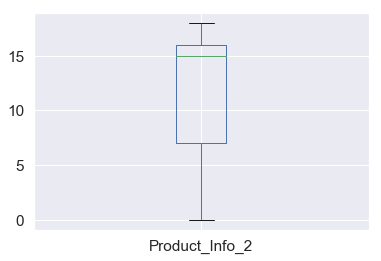

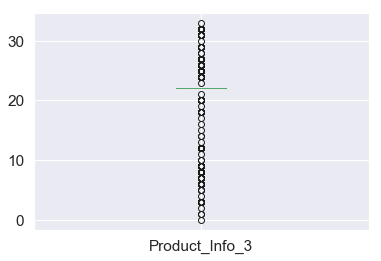

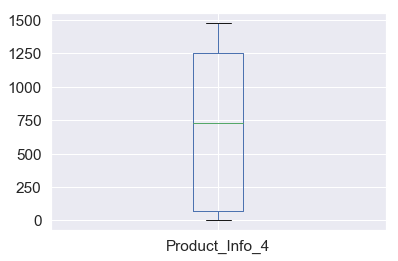

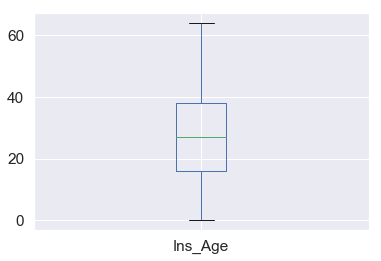

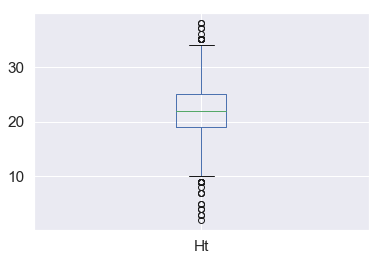

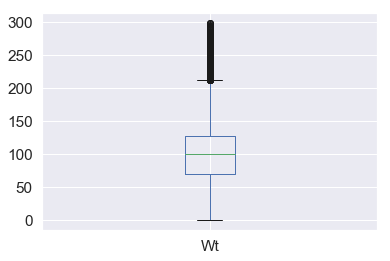

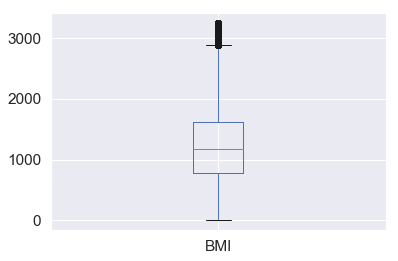

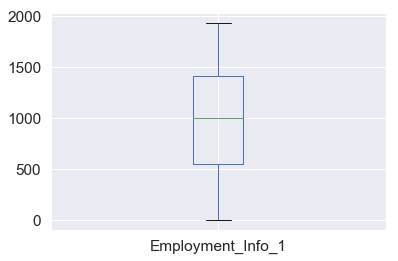

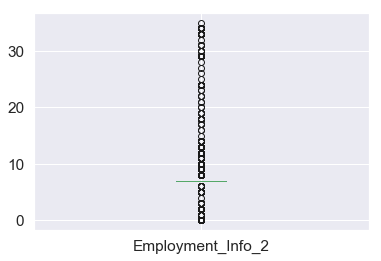

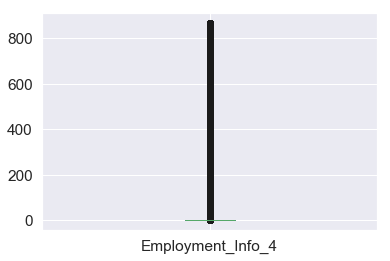

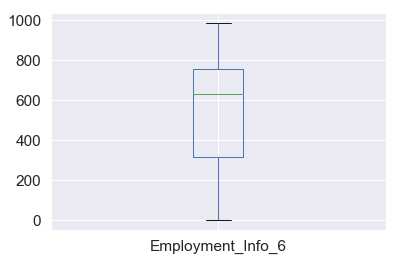

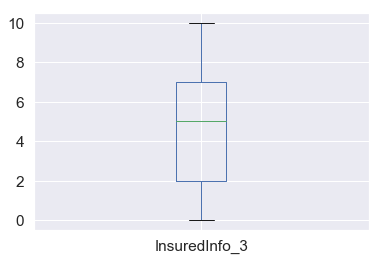

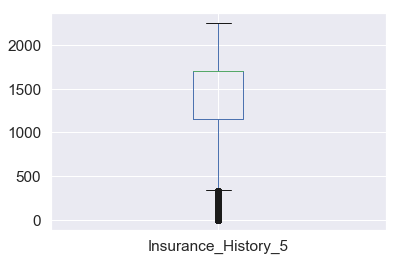

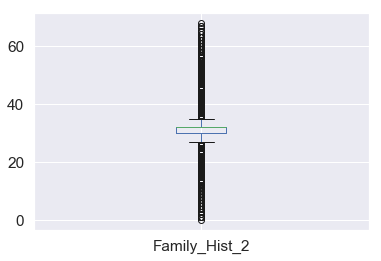

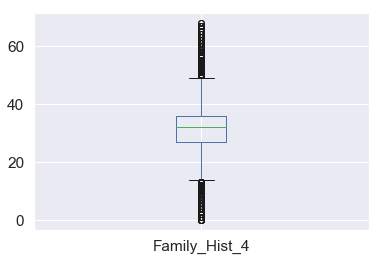

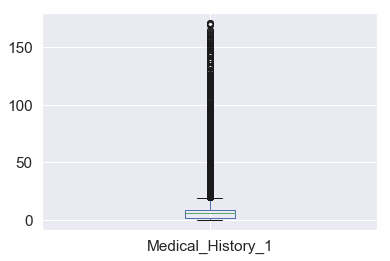

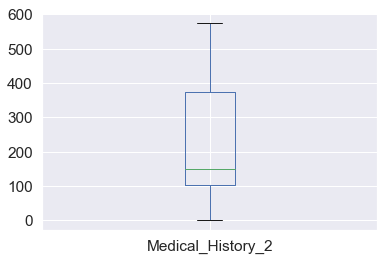

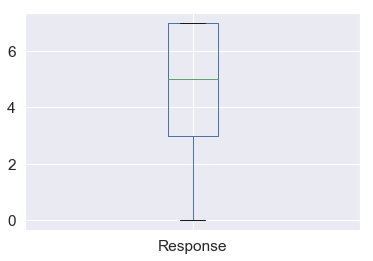

In [80]:
#BoxPlot and outlier detection
%matplotlib inline 
for i in columns_quantitative:
    columns_quantitative.boxplot(column=i)
    plt.show()

#### Removing the values in that are outside of the  the quartiles 3th and 1th.


#### The interquartile range (IQR), also called the midspread or middle 50%, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

In [113]:
Q1 = columns_quantitative.quantile(0.25)
Q3 = columns_quantitative.quantile(0.75)
IQR = Q3 - Q1
#print((((columns_quantitative < (Q1 - 1.5 * IQR)) |(columns_quantitative > (Q3 + 1.5 * IQR))).any(axis=1) == True).sum())
df_train = df_train[~((columns_quantitative < (Q1 - 1.5 * IQR)) |(columns_quantitative > (Q3 + 1.5 * IQR))).any(axis=1)]
#print(df_train)
#print(df_train["Response"])


In [114]:
df_train.shape

(7588, 120)

## Categorical values

### Analysing columns with unique values.
#### Remove if needed. 

In [115]:
#The pandas Series method nunique() returns the number of unique values, excluding any null values. 
df_train.apply(pd.Series.nunique)
columns = []

for col in df_train:
    if len(df_train[col].unique()) == 1:
        df_train.drop(col,inplace=True,axis=1)
print(df_train.shape)


(7588, 115)


### Columns with insignificant proportions 
#### Remove columns that have a proportion of values where une category has just 1% of the total of samples


In [116]:
#See the frequency of the values  in columns with <3 answers
size = len(df)
df_good_columns = df_train
for col in df_train:
    if (len(df_train[col].unique()) < 3):
        print(df_train[col].value_counts(normalize=True) < 0.01)
        cont = df_train[col].value_counts(normalize=True) < 0.01
        if(cont.any() == True):
            print(col)
            df_train =  df_train.drop(columns=col)
print(df_train.shape)

0    False
1    False
Name: Product_Info_1, dtype: bool
0    False
1     True
Name: Product_Info_5, dtype: bool
Product_Info_5
1    False
0    False
Name: Product_Info_6, dtype: bool
0    False
2    False
Name: Product_Info_7, dtype: bool
0    False
1     True
Name: InsuredInfo_2, dtype: bool
InsuredInfo_2
1    False
0    False
Name: InsuredInfo_4, dtype: bool
0    False
1     True
Name: InsuredInfo_5, dtype: bool
InsuredInfo_5
0    False
1    False
Name: InsuredInfo_6, dtype: bool
1    False
0    False
Name: Insurance_History_1, dtype: bool
0    False
2    False
Name: Insurance_History_2, dtype: bool
2    False
0    False
Name: Insurance_History_3, dtype: bool
1    False
2    False
Name: Medical_History_3, dtype: bool
1    False
0    False
Name: Medical_History_4, dtype: bool
0    False
1     True
Name: Medical_History_5, dtype: bool
Medical_History_5
2    False
0    False
Name: Medical_History_6, dtype: bool
1    False
2    False
Name: Medical_History_12, dtype: bool
2    False
0    

In [117]:
size = len(df_train)
size
print(df_train.shape)

(7588, 89)


# Features correlation

#### Matriz of correlation

#### Removing features with correlation greater that 0.95
#### A correlation coefficient with an absolute value of 0.9 or greater represents a very strong relationship.

In [118]:

# Create correlation matrix
corr_matrix = df_train.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
print(upper)

# Find features with correlation greater than 0.95
to_drop_high = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
df_train.drop(to_drop_high, axis=1, inplace=True)


                     Product_Info_1  Product_Info_2  Product_Info_4  \
Product_Info_1                  NaN        0.023677        0.043356   
Product_Info_2                  NaN             NaN        0.294220   
Product_Info_4                  NaN             NaN             NaN   
Product_Info_6                  NaN             NaN             NaN   
Product_Info_7                  NaN             NaN             NaN   
Ins_Age                         NaN             NaN             NaN   
Ht                              NaN             NaN             NaN   
Wt                              NaN             NaN             NaN   
BMI                             NaN             NaN             NaN   
Employment_Info_1               NaN             NaN             NaN   
Employment_Info_6               NaN             NaN             NaN   
InsuredInfo_1                   NaN             NaN             NaN   
InsuredInfo_3                   NaN             NaN             NaN   
Insure

In [119]:
df_train.shape

(7588, 82)

# Learning model

### Scaling the dataset to be used in the model.

In [122]:
# Standardize data (0 mean, 1 stdev)
X_train = df_train.drop(columns=["Response"])
y_train = df_train["Response"]

X_test = X_test[X_train.columns]
X = X[X_train.columns]
scaler_standard = StandardScaler()
scaler_standard.fit(X)

X_scaled_train = scaler_standard.transform(X_train)
X_scaled_test = scaler_standard.transform(X_test)

len(df_train)

7588

In [123]:
print(sorted(Counter(y_train).items()))

[(0, 672), (1, 828), (2, 148), (3, 192), (4, 764), (5, 1393), (6, 1140), (7, 2451)]


# Testing multiple learning classification models

## KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn100 = KNeighborsClassifier(n_neighbors=60)

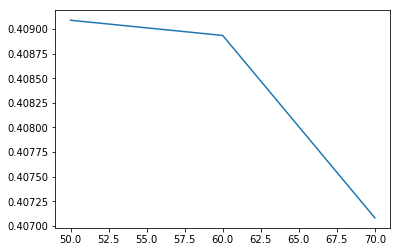

In [51]:
import matplotlib.pyplot as plt
plt.plot(n_val, acc)

In [52]:
import time

start_time = time.time()



acc = []
n_tot = df_train.shape[1]

for i in range(2,n_tot):
    clear_output()
    print(str(i)+'/'+str(n_tot))
    if(len(acc) != 0):
        print('acc: ' + str(acc[-1]))
    pca = PCA(n_components=i)
    pca.fit(X_scaled_train)
    X_pca_train = pca.transform(X_scaled_train)
    X_pca_test = pca.transform(X_scaled_test)
    knn100.fit(X_pca_train, y_train)
    acc.append(knn100.score(X_pca_test, y_test))
clear_output()
print(str(n_tot)+'/'+str(n_tot))

print("Temps d execution : %s secondes ---" % (time.time() - start_time))


52/120
acc: 0.4068756111368432


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (118,) and (50,)

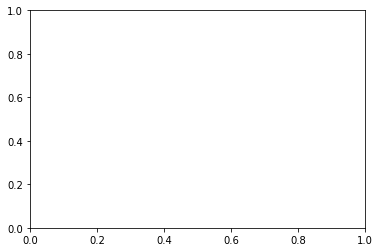

In [53]:
import matplotlib.pyplot as plt
plt.plot(range(2, n_tot), acc)

In [54]:
print(str(max(acc)) + ' (' + str(acc.index(max(acc))) + ')') 

0.4245278163758942 (13)


In [55]:
pca = PCA(n_components=13)
pca.fit(X_scaled_train)
X_pca_train = pca.transform(X_scaled_train)
X_pca_test = pca.transform(X_scaled_test)
knn100.fit(X_pca_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=60, p=2,
           weights='uniform')

In [56]:
print('Score train: %f'%knn100.score(X_pca_train, y_train))
print('Score test: %f'%knn100.score(X_pca_test, y_test))


Score train: 0.445486
Score test: 0.424322


In [57]:
y_true, y_pred = y_test , knn100.predict(X_pca_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_test, y_pred))

Results on the test set:
             precision    recall  f1-score   support

          0       0.37      0.08      0.13      2002
          1       0.33      0.18      0.23      2166
          2       0.00      0.00      0.00       333
          3       0.00      0.00      0.00       488
          4       0.28      0.14      0.19      1721
          5       0.29      0.29      0.29      3646
          6       0.30      0.22      0.25      2664
          7       0.51      0.91      0.66      6411

avg / total       0.36      0.42      0.36     19431



C:\Users\Lia\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### For a KNN a precision recall of 0.36 and 0.42

## SVM

In [59]:
from sklearn.svm import SVC

svm10 = SVC(kernel="linear", C=1.0)

In [ ]:

import time

start_time = time.time()
print("Temps d execution : %s secondes ---" % (time.time() - start_time))

acc = []

n_tot = 40

for i in range(2,n_tot):
    clear_output()
    print(str(i)+'/'+str(n_tot))
    if(len(acc) != 0):
        print('acc: ' + str(acc[-1]))
    pca = PCA(n_components=i)
    pca.fit(X_scaled_train)
    X_pca_train = pca.transform(X_scaled_train)
    X_pca_test = pca.transform(X_scaled_test)
    svm10.fit(X_pca_train, y_train)
    acc.append(svm10.score(X_pca_test, y_test))
    
clear_output()
print(str(n_tot)+'/'+str(n_tot))

19/40
acc: 0.43708507024857185


In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(2, len(acc)+2), acc)

In [65]:
print(str(max(acc)) + ' (' + str(acc.index(max(acc))) + ')') 

0.43708507024857185 (16)


In [66]:
pca = PCA(n_components=16)
pca.fit(X_scaled_train)
X_pca_train = pca.transform(X_scaled_train)
X_pca_test = pca.transform(X_scaled_test)
svm10.fit(X_pca_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
print('Score train: %f'%svm10.score(X_pca_train, y_train))
print('Score test: %f'%svm10.score(X_pca_test, y_test))


Score train: 0.443560
Score test: 0.434409


In [68]:
y_true, y_pred = y_test , svm10.predict(X_pca_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_test, y_pred))

Results on the test set:
             precision    recall  f1-score   support

          0       0.31      0.03      0.06      2002
          1       0.33      0.20      0.25      2166
          2       0.00      0.00      0.00       333
          3       0.00      0.00      0.00       488
          4       0.25      0.24      0.25      1721
          5       0.29      0.33      0.31      3646
          6       0.35      0.20      0.26      2664
          7       0.55      0.90      0.68      6411

avg / total       0.37      0.43      0.37     19431



C:\Users\Lia\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### For a SVM a precision recall of 0.87 and 0.87

## Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

logReg10 = LogisticRegression(C=1.0, solver = 'lbfgs')

In [75]:
acc = []

n_tot = df_train.shape[1]

for i in range(2,n_tot):
    clear_output()
    print(str(i)+'/'+str(n_tot))
    if(len(acc) != 0):
        print('acc: ' + str(acc[-1]))
    pca = PCA(n_components=i)
    pca.fit(X_scaled_train)
    X_pca_train = pca.transform(X_scaled_train)
    X_pca_test = pca.transform(X_scaled_test)
    logReg10.fit(X_pca_train, y_train)
    acc.append(logReg10.score(X_pca_test, y_test))
    
clear_output()
print(str(n_tot)+'/'+str(n_tot))

81/120
acc: 0.46153054397612064


ValueError: n_components=81 must be between 0 and n_features=80 with svd_solver='full'

ValueError: x and y must have same first dimension, but have shapes (118,) and (79,)

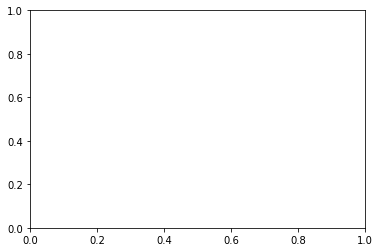

In [76]:
import matplotlib.pyplot as plt
plt.plot(range(2, n_tot), acc)

In [77]:
print(str(max(acc)) + ' (' + str(acc.index(max(acc))) + ')') 

0.4631259327878133 (73)


In [78]:
start_time = time.time()
print("Temps d execution : %s secondes ---" % (time.time() - start_time))
pca = PCA(n_components=73)
pca.fit(X_scaled_train)
X_pca_train = pca.transform(X_scaled_train)
X_pca_test = pca.transform(X_scaled_test)
logReg10.fit(X_pca_train, y_train)

Temps d execution : 0.0 secondes ---


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
print('Score train: %f'%logReg10.score(X_pca_train, y_train))
print('Score test: %f'%logReg10.score(X_pca_test, y_test))


Score train: 0.490176
Score test: 0.461016


In [80]:
y_true, y_pred = y_test , logReg10.predict(X_pca_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_test, y_pred))

Results on the test set:
             precision    recall  f1-score   support

          0       0.34      0.17      0.23      2002
          1       0.33      0.17      0.22      2166
          2       0.18      0.06      0.09       333
          3       0.19      0.09      0.12       488
          4       0.34      0.32      0.33      1721
          5       0.33      0.32      0.33      3646
          6       0.38      0.26      0.31      2664
          7       0.58      0.90      0.70      6411

avg / total       0.41      0.46      0.42     19431



#### For a linear regression a precision recall of 0.87 and 0.89

# Neural Network

In [81]:
from sklearn.neural_network import MLPClassifier

network = MLPClassifier(hidden_layer_sizes=(20,10),
                        activation="relu", 
                        max_iter=5000)

In [82]:
acc = []

n_tot = df.shape[1]

for i in range(2,n_tot):
    clear_output()
    print(str(i)+'/'+str(n_tot))
    if(len(acc) != 0):
        print('acc: ' + str(acc[-1]))
    pca = PCA(n_components=i)
    pca.fit(X_scaled_train)
    X_pca_train = pca.transform(X_scaled_train)
    X_pca_test = pca.transform(X_scaled_test)
    network.fit(X_pca_train, y_train)
    acc.append(network.score(X_pca_test, y_test))
    
clear_output()
print(str(n_tot)+'/'+str(n_tot))

15/120
acc: 0.345890587206011


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(2, n_tot), acc)

In [ ]:
print(str(max(acc)) + ' (' + str(acc.index(max(acc))) + ')') 

In [ ]:
pca = PCA(n_components=51)
pca.fit(X_scaled_train)
X_pca_train = pca.transform(X_scaled_train)
X_pca_test = pca.transform(X_scaled_test)
network.fit(X_pca_train, y_train)

In [ ]:
print('Score train: %f'%network.score(X_pca_train, y_train))
print('Score test: %f'%network.score(X_pca_test, y_test))


In [ ]:
y_true, y_pred = y_test , network.predict(X_pca_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_test, y_pred))

In [26]:
from sklearn.neural_network import MLPClassifier

network = MLPClassifier(hidden_layer_sizes=(20,10),
                        activation="relu", 
                        max_iter=5000)

network.fit(X_scaled_train, y_train)

print("ReLu activation")
print("  Train accuracy:", network.score(X_scaled_train, y_train))
print("  Test  accuracy:", network.score(X_scaled_test, y_test))
print("  Extended accuracy:", extended_score(network.predict(X_scaled_test), y_test.values))

ReLu activation
  Train accuracy: 0.5798252581413821
  Test  accuracy: 0.4381658175081056
  Extended accuracy: 0.6314651844989965


In [27]:
y_true, y_pred = y_test , network.predict(X_scaled_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_test, y_pred))

Results on the test set:
             precision    recall  f1-score   support

          0       0.29      0.18      0.22      2036
          1       0.23      0.24      0.24      2109
          2       0.10      0.03      0.05       338
          3       0.16      0.03      0.06       467
          4       0.35      0.29      0.32      1795
          5       0.33      0.37      0.35      3672
          6       0.36      0.26      0.30      2653
          7       0.61      0.80      0.69      6361

avg / total       0.40      0.44      0.41     19431



#### For a multi-class neural network a precision recall of 0.84 and 0.85

### Result: Giving the results of each model we have choosen the Logistic Regression as our Classification Model

# Tunning the model with the train dataset

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

mlp = MLPClassifier()

In [127]:
grid_values = {
    'hidden_layer_sizes': [(50,20), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05]
   }
grid_clf_acc = GridSearchCV(mlp, param_grid = grid_values)
grid_clf_acc.fit(X_scaled_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_scaled_test)


C:\Users\Lia\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Lia\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Lia\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Lia\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

C:\Users\Lia\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Lia\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Lia\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Lia\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

In [128]:
X_scaled_train.shape

(7588, 81)

In [129]:
from sklearn.metrics import *
print('Best parameters found:\n', grid_clf_acc.best_params_)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print("  Extended accuracy:", extended_score(y_pred_acc, y_test.values))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'solver': 'sgd'}
Accuracy Score : 0.4563841284545314
  Extended accuracy: 0.643610725129947


In [131]:
#Precision is a measure of the ability of a classification model to identify only the relevant data points, 
#while recall is a measure of the ability of a model to find all the relevant cases within a dataset.
y_true, y_pred = y_test , grid_clf_acc.predict(X_scaled_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
             precision    recall  f1-score   support

          0       0.33      0.18      0.23      2072
          1       0.28      0.19      0.22      2185
          2       0.18      0.03      0.05       321
          3       0.22      0.10      0.13       445
          4       0.33      0.36      0.34      1792
          5       0.33      0.37      0.35      3623
          6       0.39      0.25      0.31      2645
          7       0.61      0.85      0.71      6348

avg / total       0.42      0.46      0.42     19431



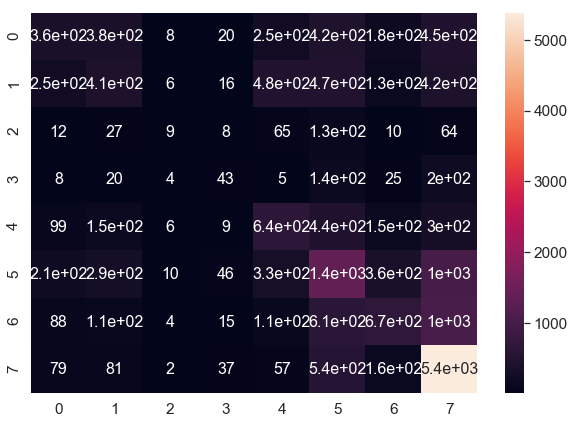

In [132]:
#Logistic Regression (Grid Search) Confusion matrix
array = confusion_matrix(y_test,y_pred)

df_cm = pd.DataFrame(array, range(8), range(8))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [133]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(grid_clf_acc, open(filename, 'wb'), protocol = 2)
 
